# AOS_DM-31532 rotation: comCam grid 

Make the regular input catalog:

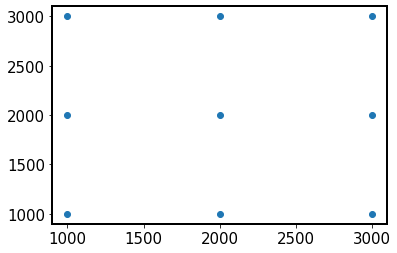

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams 
import matplotlib.patheffects as path_effects

from astropy.io import fits
from astropy.visualization import ZScaleInterval
from astropy.table import Table

import run_ps1_functions as func 

from lsst.daf import butler as dafButler
import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay

rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18


xPx = np.arange(1000,4000,1000)
yPx = xPx.copy()
X,Y = np.meshgrid(xPx, yPx)
x= np.ravel(X)
y = np.ravel(Y)
plt.scatter(x,y)



In [2]:
from lsst.obs.lsst import LsstComCam
camera = LsstComCam().getCamera()


# Instead of applying offset to the central sensor of the focal plane,
# I just add these points to each sensor in the camera, because
# I need well-separated stars ...

raList = np.zeros(0)
decList = np.zeros(0)
xPxList = np.zeros(0)
yPxList = np.zeros(0)
for detector in camera:
      
    ra, dec, xPx, yPx = func.ccd_xy_to_radec(x_px=x, y_px=y, 
                                           boresight_ra=0.03, boresight_dec=-0.02, 
                                           rotskypos=0, sensorNameList = [detector.getName()])

    raList = np.append(raList, ra) #.append(ra)
    decList = np.append(decList, dec) #.append(dec)
    xPxList = np.append(xPxList, xPx)
    yPxList = np.append(yPxList, yPx)

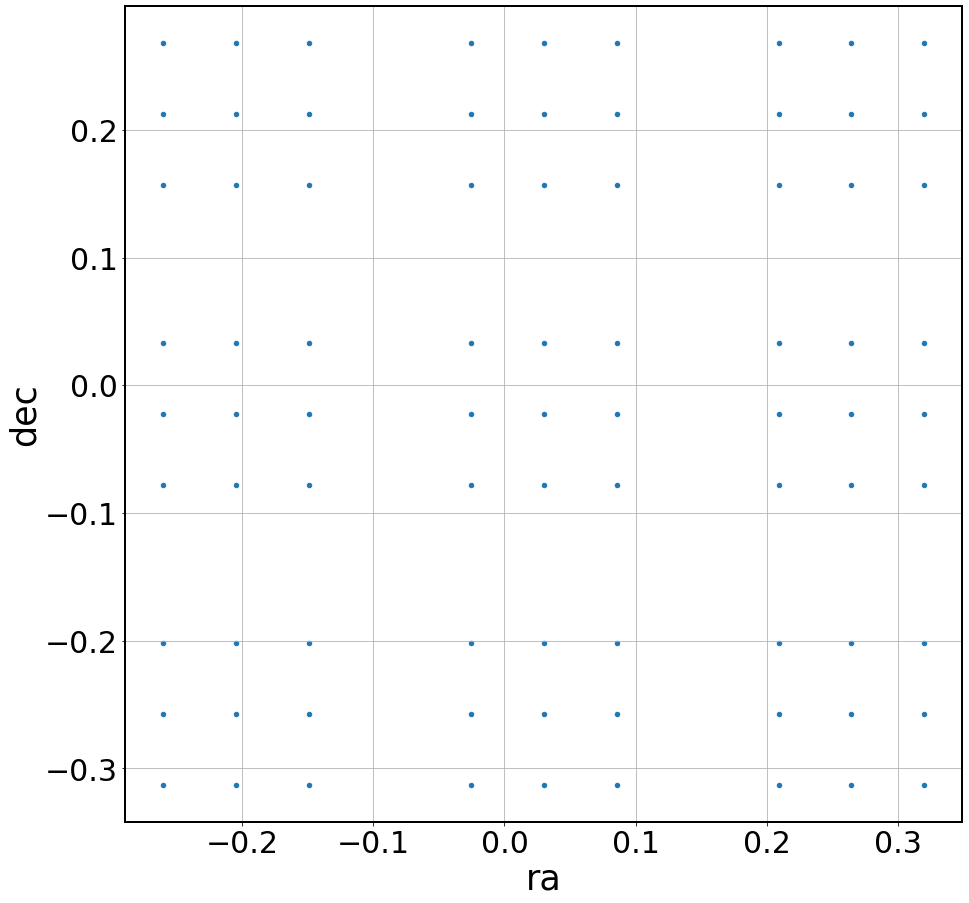

In [3]:
# Plot the star 
ra = raList.copy()
ra[ra>180] = ra[ra>180]-360

dec = decList
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.scatter(ra,dec,s=20)
plt.tick_params(axis='both', which='major', labelsize=30)
ax.set_xlabel('ra',fontsize=35)
ax.set_ylabel('dec',fontsize=35)

ax.grid()



In [ ]:
# Save the input catalog 

# make an inst catalog 
coords = Table(data=[raList, decList],  names=['Ra','Decl'])

# add a column with object id 
coords['Id'] = np.arange(len(coords))
#coords['g'] = [starMag for x in range(len(coords))]

starMag=15

coords['Mag'] = starMag

coords[['Id','Ra','Decl','Mag']].write('/project/scichris/aos/rotation_DM-31532/comCam_grid.txt', 
                                       format='ascii.commented_header',
                                      overwrite=True)

Jobs submitted to slurm:
    
    ssh lsst-devl02
    
    source "/software/lsstsw/stack/loadLSST.bash"
    setup lsst_distrib
    source "/project/scichris/aos/setup_aos_current.sh"

Save that to `runSlurm0_b.sl` 

    cd /project/scichris/aos/rotation_DM-31532/
    cp runSlurm0_a.sl   runSlurm0_b.sl  

    python /project/scichris/aos/ts_phosim/bin.src/imgCloseLoop.py --inst comcam --numOfProc 55 --boresightDeg 0.03 -0.02 --rotCam 0 --skyFile /project/scichris/aos/rotation_DM-31532/comCam_grid.txt --output /project/scichris/aos/rotation_DM-31532/s_rotCam_0_b/


and likewise making a copy of 

    cp runSlurm30_a.sl   runSlurm30_b.sl  

    python /project/scichris/aos/ts_phosim/bin.src/imgCloseLoop.py --inst comcam --numOfProc 55 --boresightDeg 0.03 -0.02 --rotCam 30 --skyFile /project/scichris/aos/rotation_DM-31532/comCam_grid.txt --output /project/scichris/aos/rotation_DM-31532/s_rotCam_30_b/


    cp runSlurm30n_a.sl   runSlurm30n_b.sl  

    python /project/scichris/aos/ts_phosim/bin.src/imgCloseLoop.py --inst comcam --numOfProc 55 --boresightDeg 0.03 -0.02 --rotCam -30 --skyFile /project/scichris/aos/rotation_DM-31532/comCam_grid.txt --output /project/scichris/aos/rotation_DM-31532/s_rotCam_30n_b/




    squeue
             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
             56851    normal     rot0 scichris  R       2:25      3 lsst-verify-worker[22-24]
             56852    normal    rot30 scichris  R       0:05      3 lsst-verify-worker[25-27]
             56853    normal   rot30n scichris  R       0:01      3 lsst-verify-worker[28-30]

Plot the postISR images 

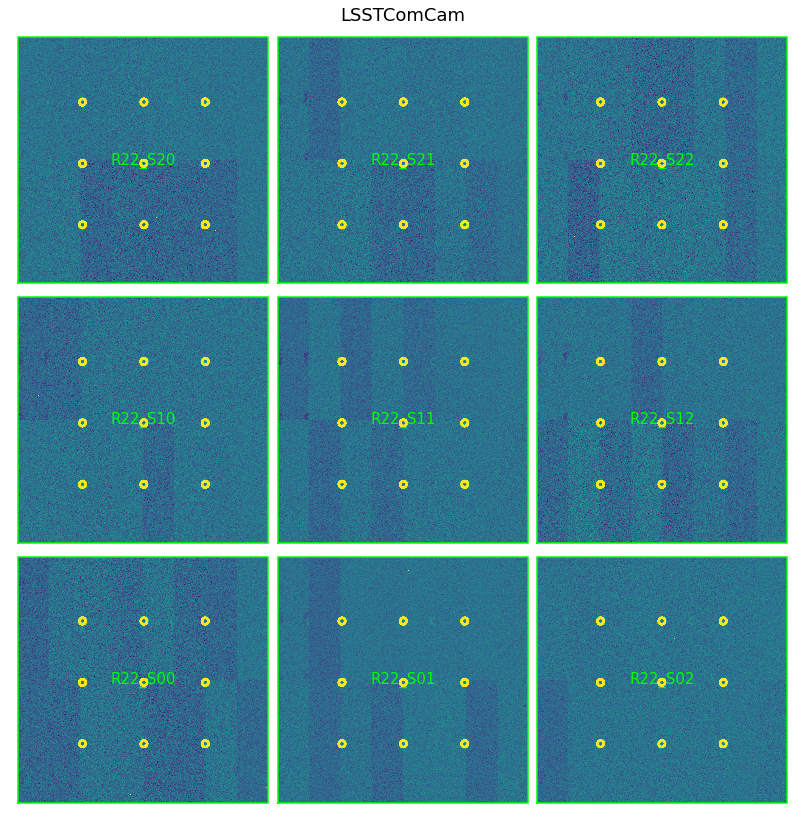

In [5]:
import run_ps1_functions as func
import imp
imp.reload(func)
repo_dir = '/project/scichris/aos/rotation_DM-31532/s_rotCam_0_b/phosimData/'
mosaic = func.plot_cameraGeom(repo_dir = repo_dir,
                    instrument = 'LSSTComCam',detectorNameList=None,
                    binSize=16, postIsrCollection='ts_phosim_9006001'
                   )

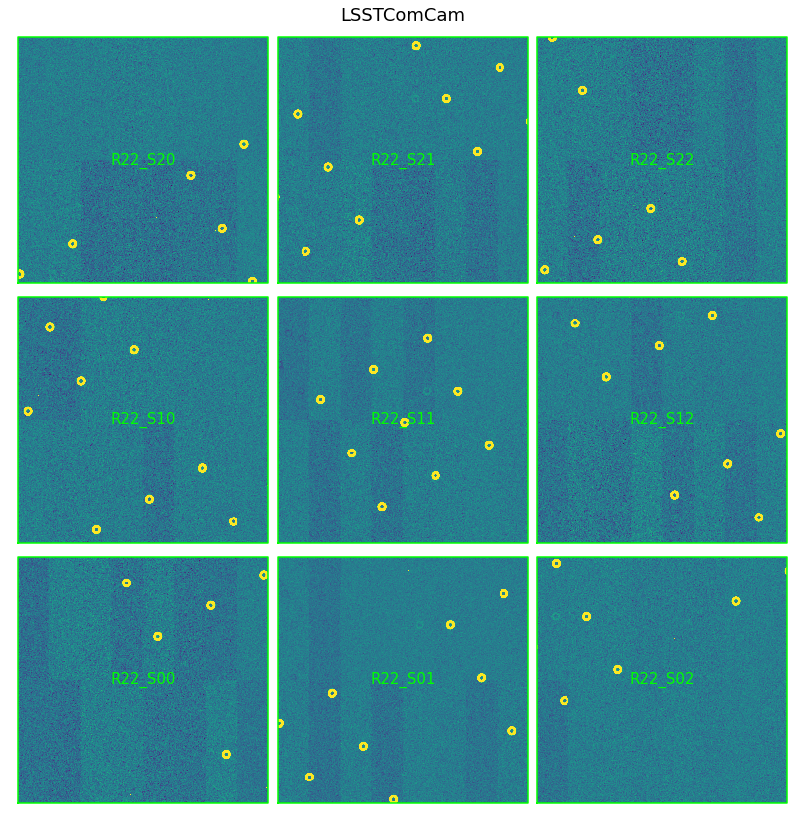

In [6]:
repo_dir = '/project/scichris/aos/rotation_DM-31532/s_rotCam_30_b/phosimData/'
mosaic = func.plot_cameraGeom(repo_dir = repo_dir,
                    instrument = 'LSSTComCam',detectorNameList=None,
                    binSize=16, postIsrCollection='ts_phosim_9006001'
                   )

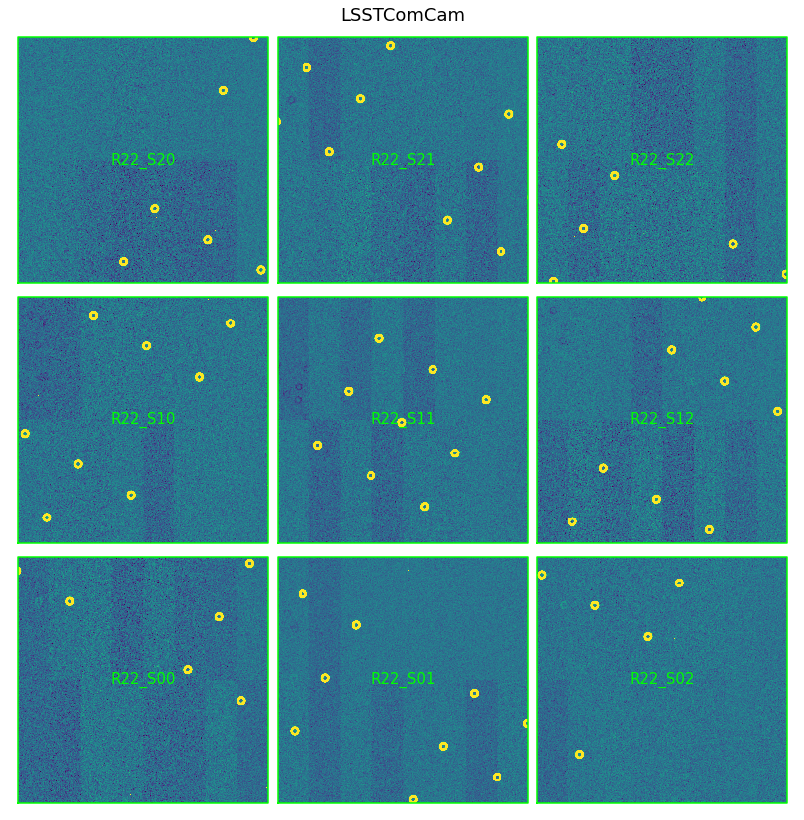

In [7]:
repo_dir = '/project/scichris/aos/rotation_DM-31532/s_rotCam_30n_b/phosimData/'
mosaic = func.plot_cameraGeom(repo_dir = repo_dir,
                    instrument = 'LSSTComCam',detectorNameList=None,
                    binSize=16, postIsrCollection='ts_phosim_9006001'
                   )

Saved fig as 1.png


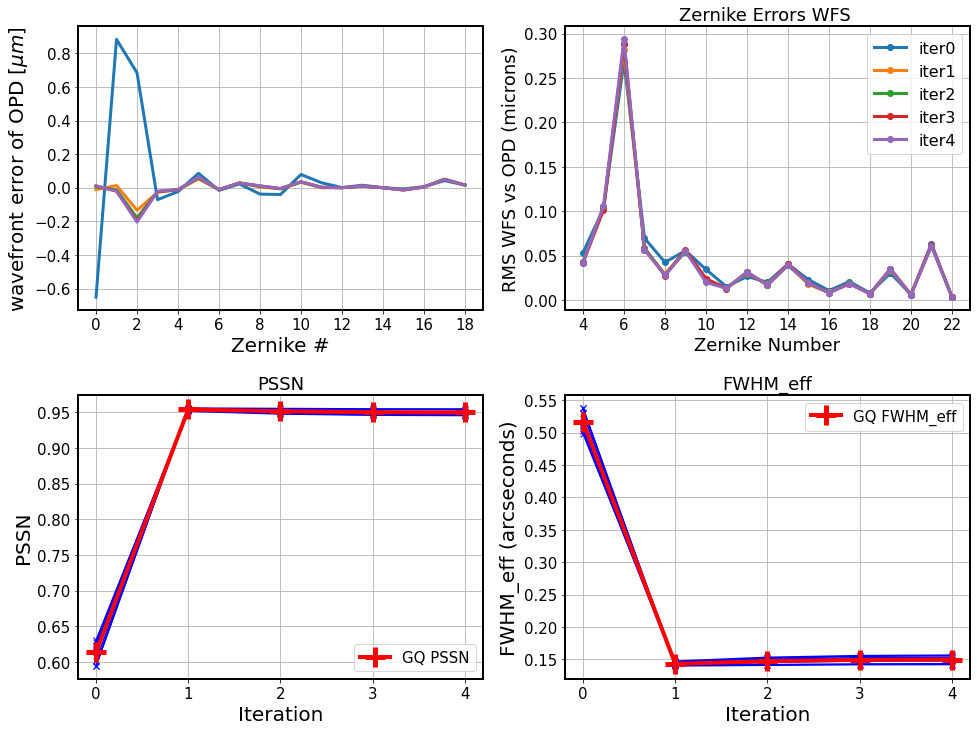

In [8]:
import sys
sys.path.append('/project/scichris/aos/')

import analysisTools as at
data_dir = '/project/scichris/aos/rotation_DM-31532/s_rotCam_0_b/'
at.plotIterationSummary(data_dir, iterNum=5,)

Saved fig as 1.png


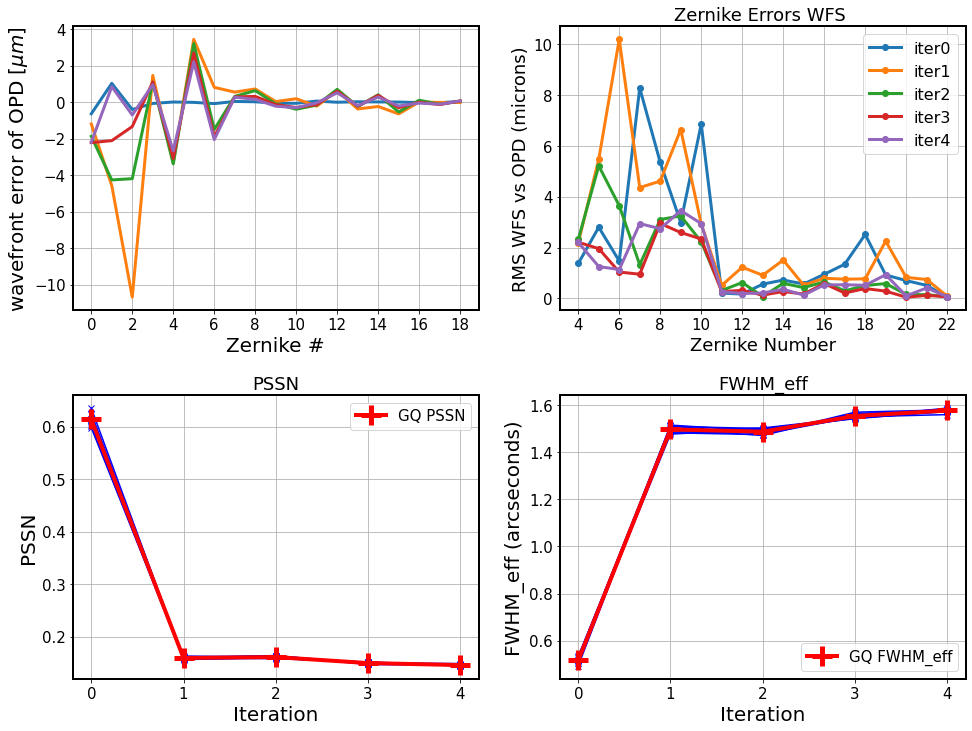

In [9]:

data_dir = '/project/scichris/aos/rotation_DM-31532/s_rotCam_30_b/'
at.plotIterationSummary(data_dir, iterNum=5,)

Saved fig as 1.png


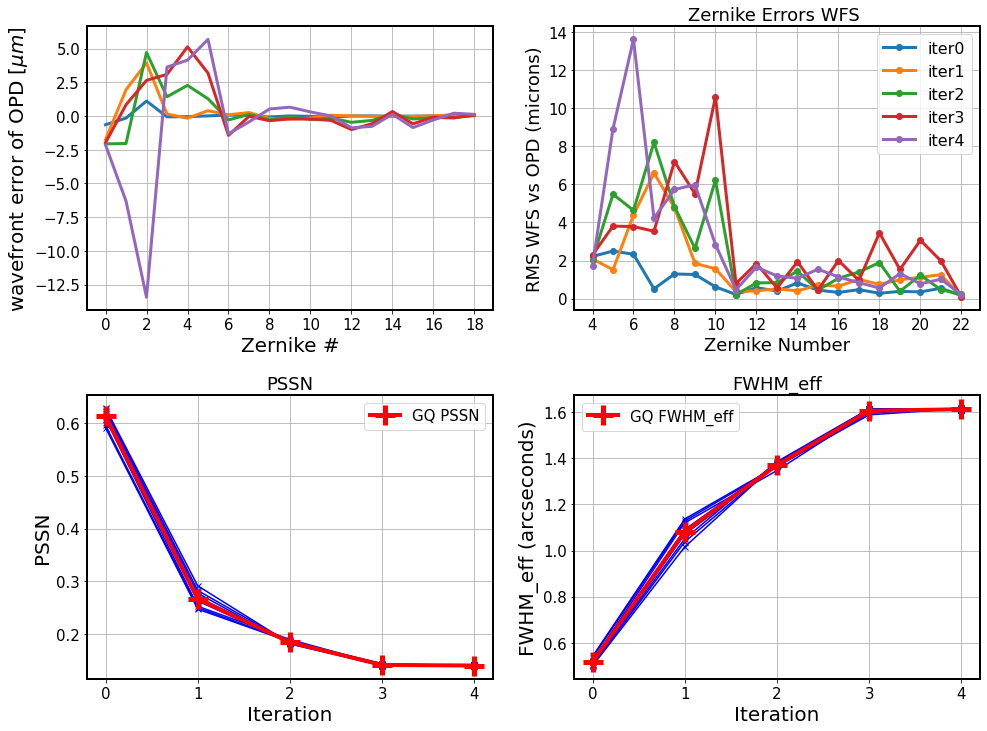

In [10]:
data_dir = '/project/scichris/aos/rotation_DM-31532/s_rotCam_30n_b/'
at.plotIterationSummary(data_dir, iterNum=5,)

# Investigate in detail data products of `camRot 30`

In [11]:
from lsst.daf import butler as dafButler

repoDir = '/project/scichris/aos/rotation_DM-31532/s_rotCam_30_b/phosimData/'
butler = dafButler.Butler(repoDir)
registry = butler.registry


for x in registry.queryCollections():
    print(x)
    
dataTypes = registry.queryDatasetTypes()
for dataType in dataTypes:
    print(dataType)

LSSTCam/raw/all
LSSTCam/calib
LSSTCam/calib/unbounded
refcats/gen2
refcats
LSSTCam/defaults
skymaps
LSSTComCam/raw/all
LSSTComCam/calib
LSSTComCam/calib/unbounded
ts_phosim_9006001
ts_phosim_9006011
ts_phosim_9006021
ts_phosim_9006031
ts_phosim_9006041
DatasetType('camera', {instrument}, Camera, isCalibration=True)
DatasetType('cal_ref_cat', {htm7}, SimpleCatalog)
DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)
DatasetType('packages', {}, Packages)
DatasetType('isr_config', {}, Config)
DatasetType('estimateZernikesFamTask_config', {}, Config)
DatasetType('generateDonutCatalogOnlineTask_config', {}, Config)
DatasetType('postISRCCD', {band, instrument, detector, physical_filter, exposure}, Exposure)
DatasetType('donutCatalog', {instrument}, DataFrame)
DatasetType('isr_metadata', {band, instrument, detector, physical_filter, exposure}, PropertySet)
DatasetType('isr_log', {band, instrument, detector, physical_filter, exposure}, ButlerLogRecords)
Datase

In [12]:
runName = 'ts_phosim_9006001'
datasetRefs = list(registry.queryDatasets(datasetType='postISRCCD', collections=[runName]))
for ref in datasetRefs:
    print(ref.dataId)

{instrument: 'LSSTComCam', detector: 7, exposure: 4021123106001, ...}
{instrument: 'LSSTComCam', detector: 6, exposure: 4021123106001, ...}
{instrument: 'LSSTComCam', detector: 3, exposure: 4021123106001, ...}
{instrument: 'LSSTComCam', detector: 4, exposure: 4021123106001, ...}
{instrument: 'LSSTComCam', detector: 2, exposure: 4021123106001, ...}
{instrument: 'LSSTComCam', detector: 0, exposure: 4021123106002, ...}
{instrument: 'LSSTComCam', detector: 5, exposure: 4021123106002, ...}
{instrument: 'LSSTComCam', detector: 8, exposure: 4021123106002, ...}
{instrument: 'LSSTComCam', detector: 5, exposure: 4021123106001, ...}
{instrument: 'LSSTComCam', detector: 4, exposure: 4021123106002, ...}
{instrument: 'LSSTComCam', detector: 1, exposure: 4021123106001, ...}
{instrument: 'LSSTComCam', detector: 2, exposure: 4021123106002, ...}
{instrument: 'LSSTComCam', detector: 3, exposure: 4021123106002, ...}
{instrument: 'LSSTComCam', detector: 6, exposure: 4021123106002, ...}
{instrument: 'LSSTCo

In [13]:
dataId = {'instrument': 'LSSTComCam', 'detector': 7, 'exposure': 4021123106001}

In [14]:
srcCat = butler.get('donutCatalog', dataId=dataId, collections=[runName])

In [15]:
extraFocalStamps = butler.get('donutStampsExtra', dataId=dataId, collections=[runName])

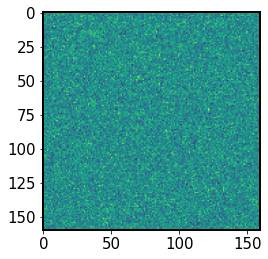

In [16]:
donut = extraFocalStamps[5]
plt.imshow(donut.stamp_im.image.array)

In [17]:

postIsrExp = butler.get('postISRCCD', dataId=dataId, collections=[runName])

Text(0.5, 1.0, 'Donut Sources on R22_S21')

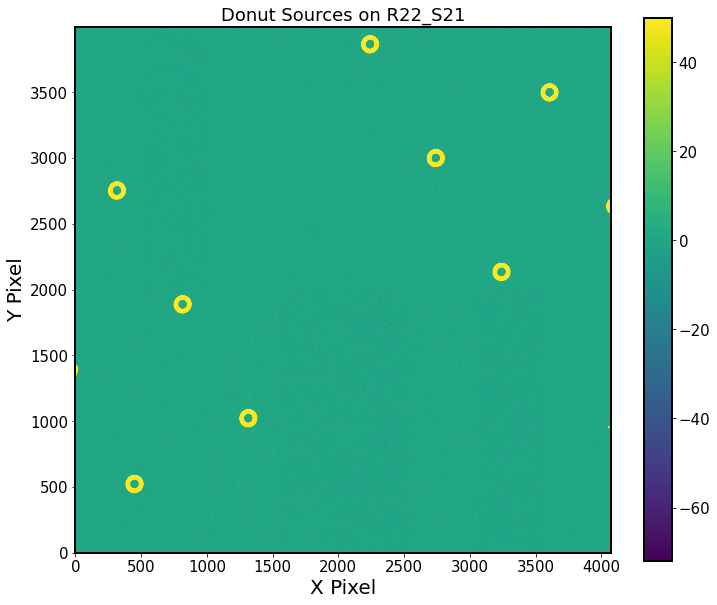

In [19]:
%matplotlib inline
fig = plt.figure(figsize=(12, 10))
plt.imshow(postIsrExp.image.array, origin='lower', vmax=50)
plt.colorbar()
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.title(f'Donut Sources on {postIsrExp.getDetector().getName()}')

In [20]:
exposureName = postIsrExp.getDetector().getName()
expCatalog = srcCat.query(f'detector == "{exposureName}"')


In [21]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.visualization import ZScaleInterval
import astropy.units as u

def plotRaDec(postIsrExp):
    
    """
    Plot the image data and the WCS overlay.
    
    Parameters
    ----------
    postIsrExp : lsst.afw.image.Exposure
        The post-ISR exposure from the butler repository.
    """
    # Get the WCS for the projection
    wcs = postIsrExp.getWcs()
    header_dict = dict(wcs.getFitsMetadata())
    
    # Add in axis information
    header_dict['NAXIS'] = 2
    header_dict['NAXIS1'] = 4072
    header_dict['NAXIS2'] = 4000
    
    # Convert to astropy readable WCS
    astropyWcs = WCS(header_dict)
    
    # Grab image data and plot
    data = postIsrExp.getImage().getArray()
    zscale = ZScaleInterval()
    vmin, vmax = zscale.get_limits(data)

    plt.subplot(projection=astropyWcs)#, slices=('y', 'x'))
    plt.imshow(data, vmin=vmin, vmax=vmax,cmap='Greys',)

    # Format coordinates presentation
    ax = plt.gca()

    # Fix axis label issue (https://github.com/astropy/astropy/issues/7180)
    ax.coords[0].set_ticklabel_position('l')
    ax.coords[0].grid(color='yellow')
    ax.set_ylabel('RA')
    
    ax.coords[1].set_ticklabel_position('b')
    ax.coords[1].grid(color='yellow')
    ax.set_xlabel('Dec')

Text(0.5, 1.0, 'Donut Sources on R22_S21')

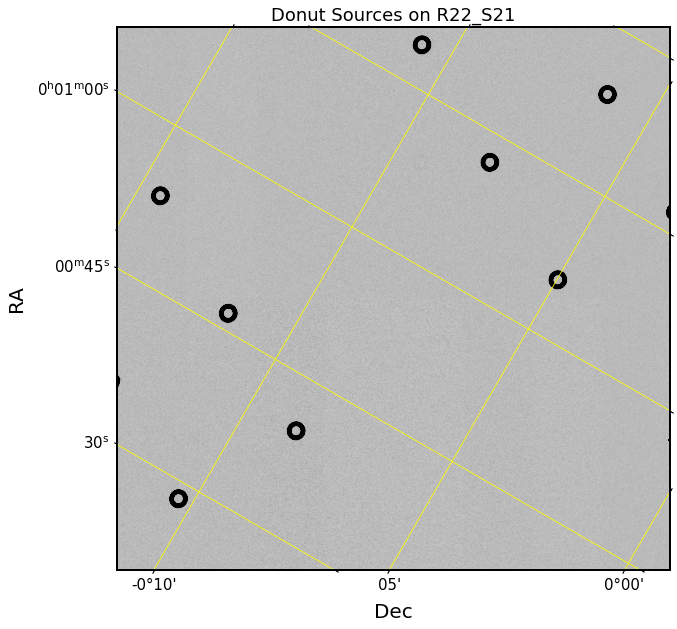

In [22]:
# plot the data and the WCS overlay 
fig = plt.figure(figsize=(10,10))
plotRaDec(postIsrExp)
plt.title(f'Donut Sources on {postIsrExp.getDetector().getName()}')

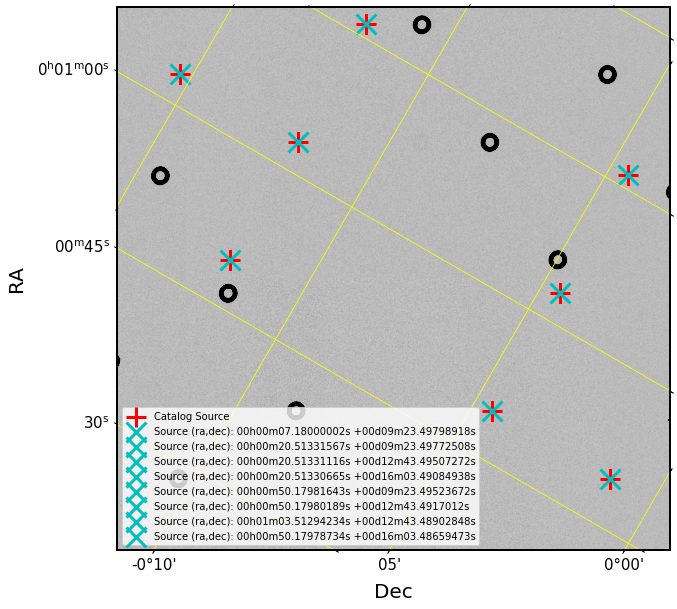

In [23]:
from astropy.coordinates import SkyCoord
fig = plt.figure(figsize=(24, 10))
plotRaDec(postIsrExp)

plt.scatter(expCatalog['centroid_x'], expCatalog['centroid_y'], c='r', s=400, marker='+', lw=3, label='Catalog Source')
for i in range(len(expCatalog)):
    source_i = SkyCoord(ra=expCatalog['coord_ra'].iloc[i] * u.rad, dec=expCatalog['coord_dec'].iloc[i] * u.rad, frame='icrs')
    plt.scatter(expCatalog['centroid_x'].iloc[i], expCatalog['centroid_y'].iloc[i], marker='x', s=400, c='c', lw=3, 
            label=f"Source (ra,dec): {source_i.to_string('hmsdms')}")
plt.legend()   